In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

In [2]:
df_mobile = pd.read_csv("E:\project 7 knn\Mobile_data.csv")

In [3]:
df_mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [4]:
df_mobile.shape

(2000, 15)

In [5]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
df_mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [7]:
# splitting features and the target variable
# consider all the columns except 'RGD' using 'iloc'
df_features = df_mobile.iloc[:, df_mobile.columns != 'price_range']

# consider the target variable
df_target = df_mobile.iloc[:, df_mobile.columns == 'price_range']

In [8]:
df_features.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [9]:
df_target.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [10]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_features.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [11]:
# 4.1.3 Distribution of Variables¶
# Image 	
# Check the distribution of all the variables

# 1. Distribution of numeric independent variables
# 2. Distribution of categoric independent variables
# 3. Distribution of dependent variable
# 1. Distribution of numeric independent variables.

# For the independent numeric variables, we plot the histogram to check the distribution of the variables.


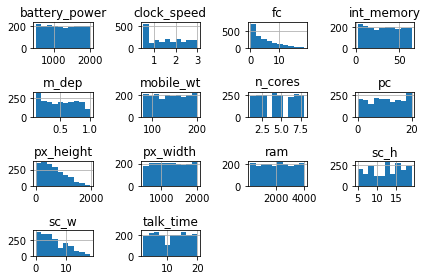

In [12]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_features.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

In [13]:
# 2. Distribution of dependent variable.

# In section 4.1.1, we have split the dependent variable (RGD) and created a dataframe 'df_target'. Use this dataframe to check the distribution of RGD.


In [14]:
# get counts of 0's, 1's, 2's and 3's in the 'price_range' variable using 'value_counts()'
# store the values in 'class_frequency'
df_target.price_range.value_counts()


0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

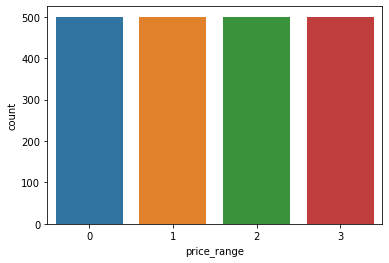

In [15]:
# plot the countplot of the variable 'price_range'
sns.countplot(x = df_target.price_range)
# to show the plot
plt.show()

In [16]:
# There are equal observations in each class thus we see that there is a perfect balance between the four classes of the target variable.

In [17]:
price_group = df_mobile.groupby('price_range')

In [18]:
price_group

In [19]:
df_mobile.groupby('price_range')['ram'].mean()  # here we can combine the code

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

In [20]:
price_group['ram'].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='ram'>

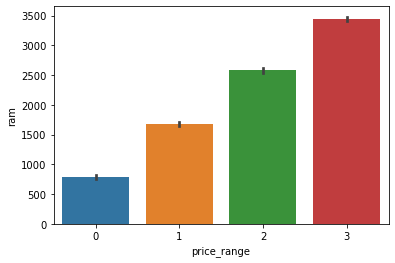

In [21]:
# create a barplot for price_range and ram
sns.barplot('price_range', 'ram', data=df_mobile)

In [22]:
# Interpretation: The price of the mobile increases as the ram increases.


In [23]:

# 4.1.4 Correlation
# Image 	
# To check the correlation between numerical variables, we perform the following steps:

# 1. Compute a correlation matrix
# 2. Plot a heatmap for the correlation matrix

# 1. Compute a correlation matrix


In [24]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df_features.corr()

# print the correlation matrix
corrmat

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


In [25]:
# 2. Plot the heatmap for the diagonal correlation matrix

# A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.


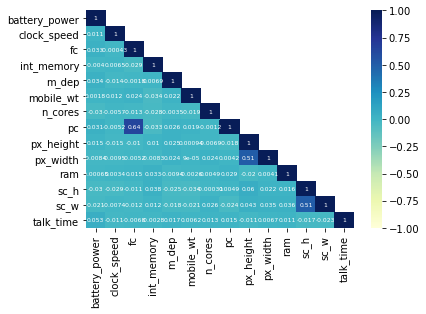

In [30]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 6}, mask = mask)

# display the plot
plt.show()

In [31]:
# From the above heatmap, it can see that most of the continuous variables are not correlated with each other since the correlation coefficients are close to zero. The maximum positive correlation is 0.64 between 'fc' and 'pc'. SImilarly 'px_height' and 'px_weight' have the correlation of 0.51 and 'sc_h' and 'sc_w' also havve the same correlation value of 0.51.
# Note: The diagonal values are always 1 because it is the correlation of the variable with itself.
# Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other. 

In [32]:
# To detect outliers in numeric data, we perform the following:

# 1. Plot the boxplot for numeric data
# 2. Note the variables in which outliers are present
# 3. Remove outliers by IQR method
# 4. Plot the boxplot to recheck for outliers

<AxesSubplot:>

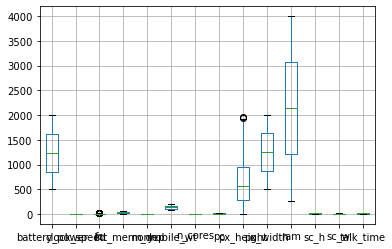

In [33]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.boxplot()

In [34]:
# Some boxplots of variables are not seen because of the extreme values im other variables.
#So let's plot a separate boxplot for these variables

<AxesSubplot:>

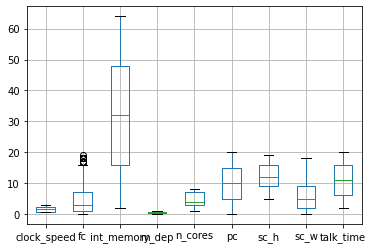

In [35]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.drop(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], axis = 1).boxplot()

In [36]:
# We can see that only 'fc' and 'px_height' have a few outliers. But they are not visible clearly. So we will plot separate boxplots for these two. 
#Otherwise all the other variables do not have any outliers

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fc'>

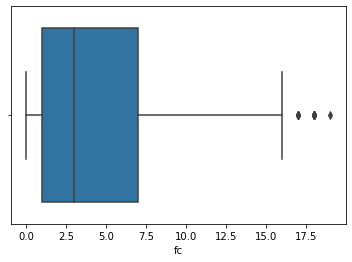

In [37]:
# plot boxplots for fc
sns.boxplot(df_features['fc'])

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='px_height'>

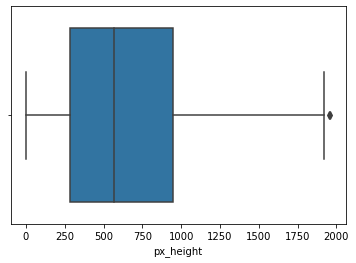

In [38]:
# plot boxplots for fc
sns.boxplot(df_features['px_height'])

In [39]:
# 2. Note the variables for which outliers are present
# Image 	
# From the above plot, we notice that for the variables 'fc' and 'px_height' there are points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

# Let us use the IQR method to remove the outliers.

# Note: The variables have not been scaled. Thus the boxplots are not visualized efficiently.
# Image 	
# Outliers can also be detected using the standard deviation method if we know that the distribution of values in the sample is Gaussian or Gaussian-like. 

In [40]:
# calculate the first quartile
Q1 = df_features.quantile(0.25)

# calculate the third quartile
Q3 = df_features.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [41]:
# remove the outliers from the dataframe 'df_mobile'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_mobile = df_mobile.reset_index(drop = True)

<ipython-input-41-d709d8b4163b>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-41-d709d8b4163b>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]


In [42]:
# 4. Plot the boxplot to recheck for outliers

# We plot the boxplots for all variables except for the variable white corpuscle for better visualization.


<AxesSubplot:>

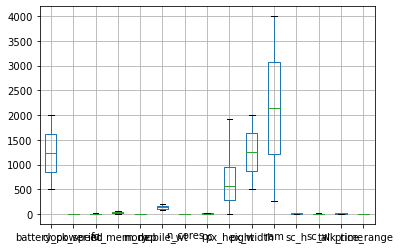

In [43]:
# plot multiple boxplots
df_mobile.boxplot()

In [44]:
# check the shape of the data after removal of outliers 
df_mobile.shape

(1980, 15)

In [45]:
# We plot a heatmap for visualization of missing values.

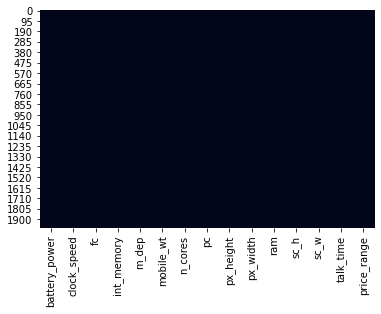

In [46]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df_mobile.isnull(), cbar=False)

# display the plot
plt.show()

In [47]:
# The horizontal lines in the heatmap correspond to the missing values. But there are no such line. This means there are no missing values.

In [48]:
# store the target variable in the variable 'y'
y = df_mobile.price_range

# drop the target variable from the dataframe
df_mobile = df_mobile.drop('price_range', axis = 1)

In [49]:
#Scale the numeric variables
#We scale the variables to get all the variables in the same range. 
#With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.


In [50]:
# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
df_num = df_mobile.apply(lambda rec: (rec - rec.mean()) / rec.std()) # we can use standard scaler function too from the sklearn and in two way we can scale the feature by normalisation and by standardisation

df_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


In [51]:
X = df_num.copy()
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


In [52]:

# 5. K Nearest Neighbors (KNN)¶

# KNN is a classification machine learning algorithm used to identify the class of the observation. 
#This algorithm search for K nearest points to determine the class of an observation. 
#To identify the nearest points, it considers the distance metrics like Euclidean, Manhattan, Chebyshev, Hamming, and so on.




In [53]:
# ** Split the dataset into train and test sets**

In [57]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1386, 14)
y_train (1386,)
X_test (594, 14)
y_test (594,)


In [60]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [71]:
test_pred = knn_model.predict(X_test)

In [64]:
y_pred = knn_model.predict(X_test)

In [65]:
y_pred

array([3, 2, 1, 1, 3, 1, 1, 0, 1, 0, 0, 2, 0, 3, 1, 0, 2, 2, 2, 1, 1, 0,
       1, 3, 0, 2, 1, 2, 1, 2, 3, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0,
       2, 3, 2, 0, 1, 3, 2, 0, 3, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 1, 2, 3,
       0, 2, 3, 0, 3, 0, 3, 0, 2, 3, 1, 0, 1, 1, 0, 1, 3, 3, 1, 2, 2, 3,
       0, 3, 2, 1, 0, 1, 2, 0, 1, 1, 1, 3, 1, 0, 3, 2, 3, 0, 3, 2, 0, 0,
       0, 3, 1, 0, 1, 2, 0, 0, 2, 1, 2, 3, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       3, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 3, 3, 1, 2, 0, 0, 3, 1, 1, 0, 1,
       0, 3, 1, 1, 2, 0, 3, 0, 1, 2, 2, 3, 3, 3, 3, 2, 1, 1, 3, 2, 2, 1,
       2, 1, 0, 1, 3, 2, 3, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 3, 2,
       3, 3, 1, 1, 3, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2,
       2, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 3, 3,
       0, 0, 3, 0, 1, 1, 3, 1, 0, 2, 2, 1, 0, 3, 2, 2, 0, 0, 0, 2, 1, 3,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 3, 0, 0, 1, 1, 1, 1, 3, 3, 3,
       1, 3, 1, 2, 1, 0, 0, 3, 3, 1, 2, 0, 2, 1, 2,

In [62]:
# Build a confusion matrix.

In [68]:
cm = confusion_matrix(y_test, y_pred)

In [69]:
cm

array([[112,  31,   1,   0],
       [ 53,  59,  36,   2],
       [ 10,  48,  64,  22],
       [  3,  19,  42,  92]], dtype=int64)

In [80]:
test_report = classification_report(y_test,y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       144
           1       0.38      0.39      0.38       150
           2       0.45      0.44      0.45       144
           3       0.79      0.59      0.68       156

    accuracy                           0.55       594
   macro avg       0.56      0.55      0.55       594
weighted avg       0.56      0.55      0.55       594



In [85]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2), #Try K = 1,3,5,7,9...,25
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\ABC\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\ABC\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable functi

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 21} 



C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\ABC\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\ABC\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable functi

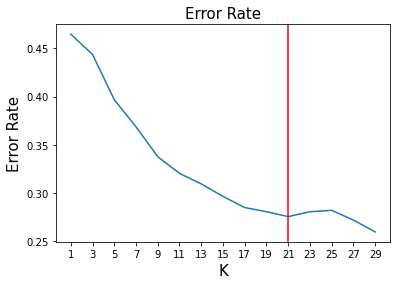

In [88]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,30,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,30,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 30, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 21, color = 'red')

# display the plot
plt.show()

In [107]:
y_pred = knn_grid.predict(X_test)
test_report = classification_report(y_test,y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       144
           1       0.64      0.60      0.62       150
           2       0.59      0.67      0.62       144
           3       0.87      0.71      0.78       156

    accuracy                           0.71       594
   macro avg       0.72      0.71      0.71       594
weighted avg       0.72      0.71      0.71       594



In [104]:
# The accuracy is 71% for this model.

In [108]:
y_pred = knn_model.predict(X_test)

In [109]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.40144018477842447


In [110]:
y_pred = knn_grid.predict(X_test)

In [111]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred1)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6121164081078021


In [112]:
# Interpretation: As, the kappa score for the tuned KNN model is 0.6121, 
#     we can say that there is substantial agrrement between the actual and predicted values. 
#     The tuned knn model with k=21 is better than the knn model with k=3.